In [157]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

## Data understanding

In [158]:
iris = datasets.load_iris()

In [159]:
iris_df = pd.DataFrame(iris.data, columns= iris.feature_names)

In [160]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [161]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [162]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [163]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [184]:
def plot_iris(X_r, y,title = 'PCA of IRIS dataset'):
    # Percentage of variance explained for each components
    print('explained variance ratio (first two components): %s'
          % str(pca.explained_variance_ratio_))

    plt.figure()
    colors = ['navy', 'turquoise', 'darkorange']
    lw = .5

    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)

    plt.show()

explained variance ratio (first two components): [0.92461872 0.05306648]


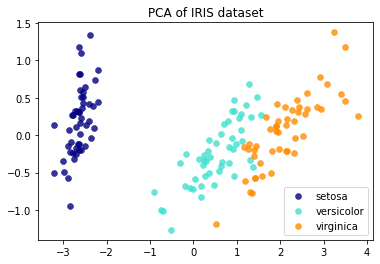

In [165]:
plot_iris(X_r,y)

## Init

In [166]:
k = 3
n_iter = 100

In [167]:
N = X.shape[0]

In [168]:
centroid = X[np.random.choice(range(N),k)]

In [169]:
Xc = np.random.choice(range(k), size = N)

In [170]:
Xc.shape

(150,)

## Preprocess understanding

In [171]:
X.shape, y.shape

((150, 4), (150,))

### Normalize the data

In [172]:
X = (X - X.mean(0))/X.std(0)

In [173]:
y = y[:, np.newaxis]

## Algorithm Scratchpad

### Define loss and distance function

In [174]:
def distance(X1,  X2):
    """
    Calculate euclidean distance between X1 and X2
    """
    return np.sqrt(np.mean((X1 - X2)**2, axis=1))

def loss(X,  Xc):
    """
    Average distance error
    """
    return distance(X, Xc).mean()

#### Compute initial loss

In [176]:
loss(X, centroid[Xc])

3.105508476051429

### Kmeans algorithm

#### Cluster assignment test

In [177]:
Xc = np.vstack([distance(X, centroid[i]) for i in range(k)]).argmin(0)

#### Centroid assignment test

In [178]:
# Get new centroid based on the mean values of Xc
centroid = np.array([centroid[Xc[Xc  ==  i]].mean(0) for i in np.unique(Xc)])

#### Run Kmeans for n_iter

Running for K-means for n_iter and saving the loss, centroid numbers and Clusters(Xc) 

In [179]:
# Store loss value and centroid numbers
loss_centroid = []
# Store clusters in each iteration
clusters = []
for _ in range(n_iter):
    # init centroid
    centroid = X[np.random.choice(range(N),k)]
    for _1 in range(1000):
        # Find clusters based on centroids
        Xc = np.vstack([distance(X, centroid[i]) for i in range(k)]).argmin(0)
        # Calculate loss
        loss_tmp = loss(X, centroid[Xc])
        # Define new centroid based on clusters
        o_centroid = np.array([X[Xc  ==  i].mean(0) for i in np.unique(Xc)])
        
        try:
            # If no change in centroid, stop
            if np.allclose(o_centroid, centroid):
                print(f"Final loss at iter {_}: ",loss_tmp)
                print("Final centroids positions : ", o_centroid)
                break
            else:
                centroid= o_centroid
        except:
            print("Centroids reduced to from k to k-1. Ignoring these cases")
            break
            


    loss_centroid.append([centroid, loss_tmp])
    clusters.append(Xc)
    


Final loss at 0:  0.49575130920243
Final centroids are :  [[-1.32765367 -0.373138   -1.13723572 -1.11486192]
 [ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]]

Final loss at 1:  0.4310459770930125
Final centroids are :  [[-1.00206653  0.90625492 -1.30310821 -1.25634413]
 [-0.16840578 -0.9726981   0.2598706   0.17543327]
 [ 1.03359865  0.00613858  0.94360463  0.9725624 ]]

Final loss at 2:  0.49575130920243
Final centroids are :  [[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]

Final loss at 3:  0.43104964330578666
Final centroids are :  [[ 1.16743407  0.14530299  1.00302557  1.0300019 ]
 [-0.01139555 -0.87600831  0.37707573  0.31115341]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]

Issue in o_centroid [[ 0.50728948 -0.42663134  0.65249366  0.62744675]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]] [[ 0.79566902 -0.13

Final loss at 62:  0.4310459770930125
Final centroids are :  [[-1.00206653  0.90625492 -1.30310821 -1.25634413]
 [-0.16840578 -0.9726981   0.2598706   0.17543327]
 [ 1.03359865  0.00613858  0.94360463  0.9725624 ]]

Final loss at 63:  0.43104964330578666
Final centroids are :  [[-0.01139555 -0.87600831  0.37707573  0.31115341]
 [ 1.16743407  0.14530299  1.00302557  1.0300019 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]]

Final loss at 64:  0.49575130920243
Final centroids are :  [[-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]
 [ 0.57100359 -0.37176778  0.69111943  0.66315198]]

Final loss at 65:  0.43104964330578666
Final centroids are :  [[ 1.16743407  0.14530299  1.00302557  1.0300019 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.01139555 -0.87600831  0.37707573  0.31115341]]

Final loss at 66:  0.4985731201661065
Final centroids are :  [[-1.2862153  -0.42495718 -1.08704162 -1.07611305]
 [-0.81623084  1.3189577

### Get clusters after fitting

In [180]:
res = pd.DataFrame(loss_centroid, columns = ['centroid', 'loss'])

low_loss_idx = res['loss'].idxmin()
res.loc[low_loss_idx]

y_kmeans = clusters[low_loss_idx]

### Plot actual classfication and kmeans results

explained variance ratio (first two components): [0.92461872 0.05306648]


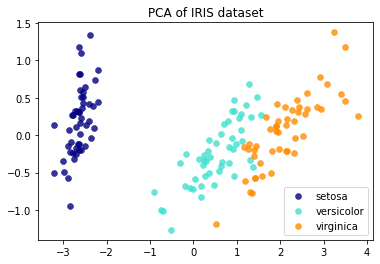

explained variance ratio (first two components): [0.92461872 0.05306648]


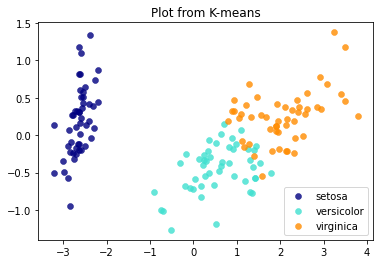

In [195]:
plot_iris(X_r,y.ravel())

plot_iris(X_r, y_kmeans, title = "Plot from K-means")

## Final OOP based K means

In [218]:
class Kmeans:
    def __init__(self, k, n_iter = 100, verbose = True):
        self.k = k 
        self.n_iter = n_iter
        self.verbose  = print if verbose  else  lambda *x: None
    
    def _preprocess(X):
        return (X-X.mean(0))/X.std(0)
    
    def distance(X1,  X2):
        """
        Calculate euclidean distance between X1 and X2
        """
        return np.sqrt(np.mean((X1 - X2)**2, axis=1))

    def loss(X,  Xc):
        """
        Average distance error
        """
        return distance(X, Xc).mean()

    def _run_kmeans(self):
        # Store loss value and centroid numbers
        self.loss_centroid = []
        # Store clusters in each iteration
        self.clusters = []
        for _ in range(n_iter):
            # init centroid
            centroid = self.X[np.random.choice(range(N),k)]
            for _1 in range(1000):
                # Cluster assignment
                Xc = np.vstack([Kmeans.distance(self.X, centroid[i]) for i in range(k)]).argmin(0)
                # Calculate loss
                loss_tmp = Kmeans.loss(self.X, centroid[Xc])
                # Define new centroid based on clusters
                o_centroid = np.array([self.X[Xc  ==  i].mean(0) for i in np.unique(Xc)])

                try:
                    # If no change in centroid, stop
                    if np.allclose(o_centroid, centroid):
                        self.verbose(f"Final loss at iter {_}: ",loss_tmp)
                        self.verbose("Final centroids positions : ", o_centroid)
                        break
                    else:
                        centroid= o_centroid
                except:
                    self.verbose("Centroids reduced to from k to k-1. Ignoring these cases")
                    break

            self.loss_centroid.append([centroid, loss_tmp])
            self.clusters.append(Xc)
        
            
    def fit(self, X, y):
        self.X = Kmeans._preprocess(X)
        self.y = y
        
        self._run_kmeans()
        self.loss_centroid = pd.DataFrame(self.loss_centroid, columns = ['centroid', 'loss'])
        

    def plot_iris(self, y = None, title = "Scatter Plot by Clusters"):
        if y is None:
            y = self.y
        y =y.ravel()
        pca = PCA(n_components=2)
        self.X_r = pca.fit(self.X).transform(self.X)
        # Percentage of variance explained for each components
        self.verbose('explained variance ratio (first two components): %s'
              % str(pca.explained_variance_ratio_))

        plt.figure()
        colors = ['navy', 'turquoise', 'darkorange']
        lw = .5

        for color, i in zip(colors, [0, 1, 2]):
            plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                        label=f"Cluster : {i}")
        plt.legend(loc='best', shadow=False, scatterpoints=1)
        plt.title(title)

        plt.show()

    
    def get_cluster(self):
        low_loss_idx = self.loss_centroid['loss'].idxmin()
        y_kmeans = self.clusters[low_loss_idx]
        return y_kmeans
    
    def get_loss_(self):
        return self.loss_centroid['loss'].min()

    def get_centroid_(self):
        low_loss_idx = self.loss_centroid['loss'].idxmin()
        return self.loss_centroid.loc[low_loss_idx,'centroid']


In [219]:
km = Kmeans(3, verbose=False)

km.fit(X,y)

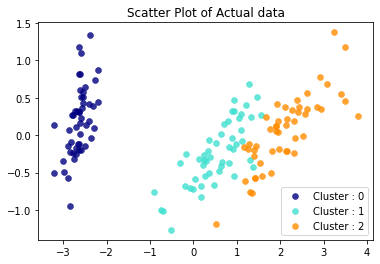

In [221]:
km.plot_iris(y, title="Scatter Plot of Actual data")

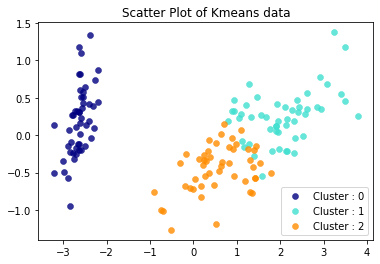

In [222]:
km.plot_iris(km.get_cluster(), title="Scatter Plot of Kmeans data")

In [223]:
km.get_loss_()

0.4299923903293611